
# CS236605:   Deep Learning
# Tutorial 3: Introduction to Convolutional Neural Networks 

## Introduction

In this tutorial, we will cover:

* Fundamental of Neural Network
* Introduction to CNNs



## Multi Layer Perceptron

The linear perceptron model is rather limited due to its linearity. For example, it cannot produce the XOR function. . We define the $i$-th layer as

$$ \mathbf{y}i = \varphi{i} ( \mathbf{W}i \mathbf{y}{i-1} + \mathbf{b}_i ), $$

for $i=1,\dots,L$, where $\mathbf{y}_{i-1}$ is an $n_{i-1}$-dimensional input, $\mathbf{y}_i$ is an $n_{i}$-dimensional output, $\mathbf{W}_i$ is an $n_i \times n_{i-1}$ matrix of weights (whose columns are denoted as $\mathbf{w}^{i}_1,\dots, \mathbf{w}^{i}_{n_{i-1}}$), $\mathbf{b}_i$ is an $n_i$-dimensional bias vector, and $\varphi_i : \mathbb{R} \rightarrow \mathbb{R}$ is is a non-linear function applied element-wise. 

Setting $\mathbf{y} = $$\mathbf{y}_L$ and $\mathbf{y}_0 = \mathbf{x}$, a multi-layer perceptron (MLP) with $L$ layers is obtained. MLP can be described by the following input-to-output map

$$ \mathbf{y}=\varphi_L \left(\mathbf{W}{L} \varphi{L-1}( \mathbf{W}{L-1} \varphi{L-2}( \cdots \varphi_1(\mathbf{W}_1 \mathbf{x}) \cdots ) ) \right). $$

parametrized by the weight matrices ${\mathbf{W}_1,\dots,\mathbf{W}_L }$ and bias vectors ${ \mathbf{b}_1,\dots,\mathbf{b}_L }$ which we will collectively denote as a pseudo-vector $\mathbf{\Theta}$.

Unlike their single-layered linear counterparts, MLPs constitute a potent hypothesis class. In fact, even with just two layers, MLPs were shown to be universal approximators – their weights can be selected to approximate any function under mild technical conditions, provided they have enough degrees of freedom (sufficiently large number of weights).


In [1]:
import torch
from torch.nn import Linear, ReLU
import torch.nn as nn
import numpy as np
from torch.autograd import Variable
## Liniar function in Pytorch ##
myLayer = Linear(in_features=10,out_features=5,bias=True)
inp = torch.randn(1,10,)
myLayer = Linear(in_features=10,out_features=5,bias=True) 
myLayer(inp)

tensor([[ 0.2807, -0.0567,  0.1527, -0.3162, -0.5009]], grad_fn=<ThAddmmBackward>)

In [2]:

  myLayer.weight

Parameter containing:
tensor([[ 0.0905, -0.3096, -0.2970, -0.1993,  0.3010, -0.1457, -0.0813, -0.1202,
          0.0758, -0.2302],
        [ 0.2558,  0.1032, -0.2163,  0.2559, -0.2996, -0.0774, -0.3052, -0.0997,
         -0.0889, -0.1035],
        [-0.1289,  0.2301,  0.1195,  0.1308,  0.1016, -0.0492, -0.2732, -0.0292,
         -0.2861, -0.2951],
        [-0.1344,  0.0520,  0.1703,  0.2032, -0.2957, -0.2423,  0.2780,  0.1861,
         -0.1722, -0.2571],
        [-0.0132, -0.2100,  0.1357, -0.0011, -0.1650, -0.0847, -0.2526, -0.1107,
          0.1367,  0.0003]], requires_grad=True)

In [3]:
myLayer.bias

Parameter containing:
tensor([0.1259, 0.1615, 0.1216, 0.2418, 0.0218], requires_grad=True)

### Stacking Linear layers

In [4]:
myLayer1 = Linear(10,5)
myLayer2 = Linear(5,2)
myLayer2(myLayer1(inp))

tensor([[0.1427, 0.0155]], grad_fn=<ThAddmmBackward>)

### Activation functions 

Various functions can be used as the element-wise nonlinearities (activation function) of the MLP. Older neural networks used the logistic function (a.k.a. sigmoid)

$$ \varphi(t) = \frac{1}{1+e^{-t}} $$

saturating the input in $\mathbb{R}$ between $0$ and $1$, or its shifted and scaled version

$$ \varphi(t) = \frac{e^t - e^{-t}}{e^t +e^{-t}} = \mathrm{tanh}, t. $$

The arctangent function also has a sigmoid-like behavior.

### Relu  

$$ \varphi(t) = [t]_+ = \max{t,0}. $$

Note that this function has the derivative of exactly $0$ on $(-\infty,0)$, exactly $1$ on $(0,\infty)$, and is non-smooth at $0$. These facts justifying its choice will be discussed in the sequel.


In [5]:
sample_data = torch.tensor([1,2,-1,-1], requires_grad=True, dtype=torch.float)
myRelu = ReLU()
myRelu(sample_data)

tensor([1., 2., 0., 0.], grad_fn=<ThresholdBackward0>)

In [6]:
import torch.nn as nn
import torch.nn.functional as F
sample_data = torch.Tensor([[1,2,-1,-1]]) 
f = F.relu(sample_data) # Much simpler.
f

tensor([[1., 2., 0., 0.]])

### Neural Network 

In [7]:
class MyFirstNetwork(nn.Module):
    def __init__(self,input_size,hidden_size,output_size):
        super(MyFirstNetwork,self).__init__() 
        self.layer1 = nn.Linear(input_size,hidden_size) 
        self.layer2 = nn.Linear(hidden_size,output_size)
    def __forward__(self,input): 
        out = self.layer1(input) 
        out = nn.ReLU(out)
        out = self.layer2(out) 
        return out

### Loss Functions 

In the supervised learning problem, we are given a finite sample of labeled training instances ${ (\mathbf{x}_i, y_i) }_{i=1}^N$. We then select a hypothesis that minimizes the empirical (in-sample) loss function,

$$ h^\ast = \mathrm{arg} \min_{h \in \mathcal{H}} \frac{1}{N} \sum_{i=1}^N \ell( h(\mathbf{x}_i), y_i). $$

In our terms, this minimization problem can be written as

$$ \mathbf{\Theta}^\ast = \mathrm{arg} \min_{\mathbf{\Theta} } \frac{1}{N} \sum_{i=1}^N \ell_i ( h_{ \mathbf{\Theta}} (\mathbf{x}_i) ), $$

where $h_{ \mathbf{\Theta}}$ is the MLP parametrized by the pseudo-vector $\mathbf{\Theta}$. Note that to simplify notation we dropped the dependence of the $i$-th pointwise loss term on $y_i$, denoting it by $\ell_i$. We will henceforth denote the loss function as

$$ L(\mathbf{\Theta}) = \frac{1}{N} \sum_{i=1}^N \ell_i ( h_{\mathbf{\Theta}} (\mathbf{x}_i) ) $$

emphasizing that we are interested in its dependence on the model parameters $\mathbf{\Theta}$. 

In [8]:
loss_fn = nn.MSELoss()
input = torch.randn(3, 5, requires_grad=True) 
target = torch.randn(3, 5)
output = loss_fn(input, target)
output.backward()
input.grad

tensor([[ 0.1357,  0.1969, -0.2268,  0.3358,  0.2073],
        [ 0.0430,  0.4468, -0.3337, -0.0365, -0.0794],
        [ 0.0990,  0.1624, -0.0097,  0.2644,  0.1770]])

In [9]:
def cross_entropy(true_label, prediction):
    if true_label == 1:
        return -log(prediction)
    else:
        return -log(1 - prediction)

In [10]:
loss_fn = nn.CrossEntropyLoss()
input = torch.randn(3, 5,requires_grad=True) 
target = torch.LongTensor(3).random_(5)
output = loss_fn(input, target)
output.backward()
input.grad

tensor([[ 0.0175,  0.0455,  0.0345,  0.0304, -0.1280],
        [ 0.0087,  0.1625, -0.2732,  0.0555,  0.0465],
        [-0.3232,  0.0451,  0.1007,  0.0603,  0.1171]])

### Gradient descent


Gradient descent can be thus summarized as

Starting with some initial guess $(\mathbf{\theta}_0$, repeat for $k=1,2,\dots)$

*    Select a step size $\eta_k$
*    Update $(\mathbf{\theta}_k = (\mathbf{\theta}_{k-1} - \eta_k \nabla L((\mathbf{\theta}_{k-1})$
*    Check optimality condition at $(\mathbf{\theta}_k$ and stop if minimum is reached

We will discuss variants of the gradient descent algorithm that are used in practice in the sequel

In [11]:
model = nn.Sequential(
    nn.Linear(28*28, 10, bias=True),
    nn.Softmax()
)

dataset = [
    (torch.randn(1,28,28), torch.randn(1,10)),
    (torch.randn(1,28,28), torch.randn(1,10)),
]

loss_fn = nn.MSELoss()

# for demo
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr = 0.01)
for input, target in dataset:
    input = input.view(1, -1)
    optimizer.zero_grad()
    output = model(input)
    loss = loss_fn(output, target)
    loss.backward()
    optimizer.step()


/Users/chaimbaskin/miniconda3/envs/cs236605-tutorials/lib/python3.6/site-packages/torch/nn/modules/container.py:91: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


### Data preproccessing 

In [12]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets,transforms
from torch.autograd import Variable
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
is_cuda = False
if torch.cuda.is_available():
    is_cuda = True

In [14]:
transformation = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,), (0.3081,))])

train_dataset = datasets.MNIST('data/',train=True,transform=transformation,download=True)
test_dataset = datasets.MNIST('data/',train=False,transform=transformation,download=True)

train_loader = torch.utils.data.DataLoader(train_dataset,batch_size=32,shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,batch_size=32,shuffle=True)

In [15]:
sample_data = next(iter(train_loader))

In [16]:
def plot_img(image):
    image = image.numpy()[0]
    mean = 0.1307
    std = 0.3081
    image = ((mean * image) + std)
    plt.imshow(image,cmap='gray')
    
    

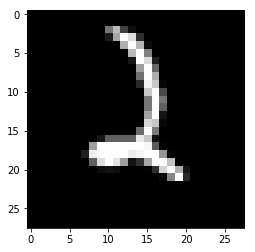

In [17]:
plot_img(sample_data[0][2])

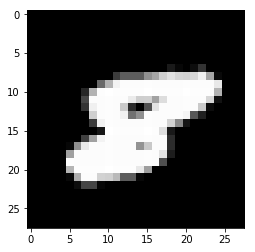

In [18]:
plot_img(sample_data[0][1])

###  Intro to Convolutional Neural Networks

Neural networks making use of shift-invariant linear operations are called convolutional neural networks (CNNs). A convolutional layer accepts an $m$-dimensional vector-valued infinitely supported signal $\mathbf{x} = (\mathbf{x}^1,\dots, \mathbf{x}^m) = { (x_i^1,\dots, x_i^m) }_{i \in \mathbb{Z}}$; each input dimension is called a channel or feature map. The layer produces an $n$-dimensional infinitely supported signal $\mathbf{y} = (\mathbf{y}^1,\dots, \mathbf{y}^n) = { (y_i^1,\dots, y_i^n) }_{i \in \mathbb{Z}}$ by applying a bank of filters,

$$ \mathbf{y}^j = \varphi\left( \sum_{i=1}^m \mathbf{w}^{ij} \ast \mathbf{x}^{i} \right), $$

or, explicitly,

$$ y^j_k = \varphi\left( \sum_{i=1}^m \sum_{p} w^{ij}p x^i{k-p} \right). $$

In practice, each filter $w^{ij}$ is supported on some small fixed domain.

In [19]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        #x = F.dropout(x,p=0.1, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x,dim=1)

In [20]:
model = Net()
if is_cuda:
    model.cuda()

In [21]:
optimizer = optim.SGD(model.parameters(),lr=0.01)

In [22]:
data , target = next(iter(train_loader))

In [23]:
if is_cuda:
    data = data.cuda()
    
output = model(data)

In [24]:
output.size()

torch.Size([32, 10])

In [25]:
target.size()

torch.Size([32])

In [26]:
def fit(epoch,model,data_loader,phase='training',volatile=False):
    if phase == 'training':
        model.train()
    if phase == 'validation':
        model.eval()
    running_loss = 0.0
    running_correct = 0
    for batch_idx , (data,target) in enumerate(data_loader):
        if is_cuda:
            data,target = data.cuda(),target.cuda()
        if phase == 'training':
            optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output,target)
        
        running_loss += F.nll_loss(output,target,size_average=False).item()
        preds = output.data.max(dim=1,keepdim=True)[1]
        running_correct += preds.eq(target.data.view_as(preds)).cpu().sum()
        if phase == 'training':
            loss.backward()
            optimizer.step()
    
    loss = running_loss/len(data_loader.dataset)
    accuracy = 100. * running_correct.item()/len(data_loader.dataset)
    print(f'{phase} loss is {loss:{5}.{2}} and {phase} accuracy is {running_correct}/{len(data_loader.dataset)}{accuracy:{10}.{4}}')
    return loss,accuracy

In [27]:
train_losses , train_accuracy = [],[]
val_losses , val_accuracy = [],[]
num_epochs = 5
for epoch in range(1,num_epochs):
    epoch_loss, epoch_accuracy = fit(epoch,model,train_loader,phase='training')
    val_epoch_loss , val_epoch_accuracy = fit(epoch,model,test_loader,phase='validation')
    train_losses.append(epoch_loss)
    train_accuracy.append(epoch_accuracy)
    val_losses.append(val_epoch_loss)
    val_accuracy.append(val_epoch_accuracy)

/Users/chaimbaskin/miniconda3/envs/cs236605-tutorials/lib/python3.6/site-packages/torch/nn/functional.py:52: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


training loss is  0.64 and training accuracy is 47866/60000     79.78
validation loss is  0.15 and validation accuracy is 9560/10000      95.6
training loss is   0.2 and training accuracy is 56498/60000     94.16
validation loss is 0.096 and validation accuracy is 9713/10000     97.13
training loss is  0.15 and training accuracy is 57376/60000     95.63
validation loss is  0.07 and validation accuracy is 9777/10000     97.77
training loss is  0.13 and training accuracy is 57743/60000     96.24
validation loss is 0.063 and validation accuracy is 9795/10000     97.95


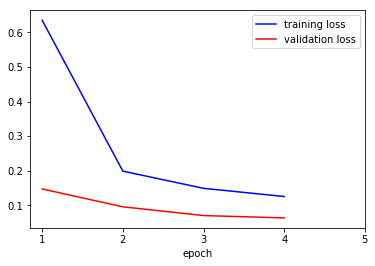

In [28]:
plt.plot(range(1,len(train_losses)+1),train_losses,'b',label = 'training loss')
plt.plot(range(1,len(val_losses)+1),val_losses,'r',label = 'validation loss')
plt.xticks(range(1, num_epochs+1)); plt.xlabel('epoch')
plt.legend();

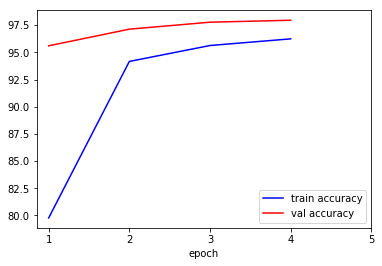

In [29]:
plt.plot(range(1,len(train_accuracy)+1),train_accuracy,'b',label = 'train accuracy')
plt.plot(range(1,len(val_accuracy)+1),val_accuracy,'r',label = 'val accuracy')
plt.xticks(range(1, num_epochs+1)); plt.xlabel('epoch')
plt.legend();

## Understanding 1d convolutions

In [30]:
conv = nn.Conv1d(1,1,3,bias=False)

In [31]:
conv.weight

Parameter containing:
tensor([[[0.5126, 0.2319, 0.5036]]], requires_grad=True)

In [32]:
sample = torch.randn(1,1,7)

In [33]:
sample

tensor([[[ 0.7602,  0.4286, -0.0338,  0.2137, -0.0132,  0.4340, -0.1800]]])

In [34]:
conv(Variable(sample))

tensor([[[0.4721, 0.3195, 0.0256, 0.3251, 0.0033]]], grad_fn=<SqueezeBackward1>)

### Understand how padding works in Conv1d

In [35]:
conv = nn.Conv1d(1,1,3,padding=2,bias=False)
conv.weight

Parameter containing:
tensor([[[ 0.5620,  0.3660, -0.5686]]], requires_grad=True)

In [36]:
sample = torch.randn(1,1,7)
sample

tensor([[[-0.3813, -0.1294,  0.6233,  0.8284, -1.8252,  0.7181, -0.9250]]])

In [37]:
conv(sample)

tensor([[[ 0.2168, -0.0660, -0.6161, -0.3156,  1.6914, -0.6109, -0.2369,
           0.0650, -0.5198]]], grad_fn=<SqueezeBackward1>)